In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [2]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [3]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [16]:
import preprocess_kgptalkie as ps
import pandas as pd

def get_basic_features(df, col_name="text"):
    df['char_count']   = df[col_name].apply(ps.get_char_count)
    df['word_count']   = df[col_name].apply(ps.get_word_count)
    df['avg_word_len'] = df[col_name].apply(ps.get_avg_wordlength)
    df['stopwords']    = df[col_name].apply(ps.get_stopwords_count)
    df['hashtags']     = df[col_name].apply(ps.get_hashtags)
    df['mentions']     = df[col_name].apply(ps.get_mentions)
    df['emails']       = df[col_name].apply(ps.get_emails)
    df['urls']         = df[col_name].apply(ps.get_urls)
    df['sentiment']    = df[col_name].apply(ps.get_sentiment)
    return df

In [17]:
df.columns  

Index(['sentiment', 'text'], dtype='object')

In [19]:
import os
os.environ["MPLCONFIGDIR"] = os.getcwd()  # use current working dir
import matplotlib.pyplot as plt


In [20]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

<Figure size 2000x1000 with 0 Axes>

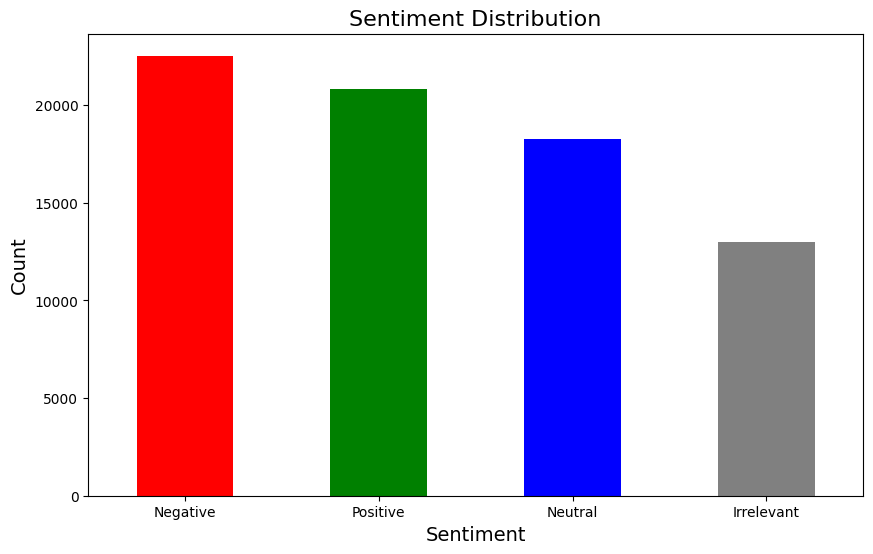

In [21]:
import matplotlib.pyplot as plt

# sentiment counts
sentiment_counts = df['sentiment'].value_counts()

# plot
plt.figure(figsize=(10,6))
sentiment_counts.plot(kind='bar', color=['red','green','blue','gray'])
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=0)
plt.show()


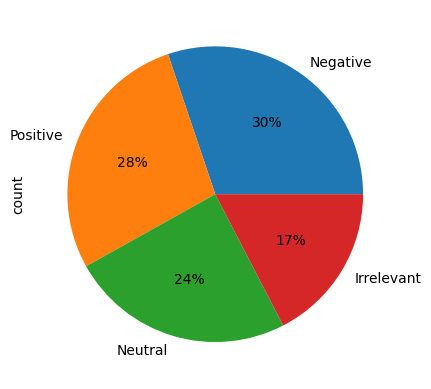

In [26]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


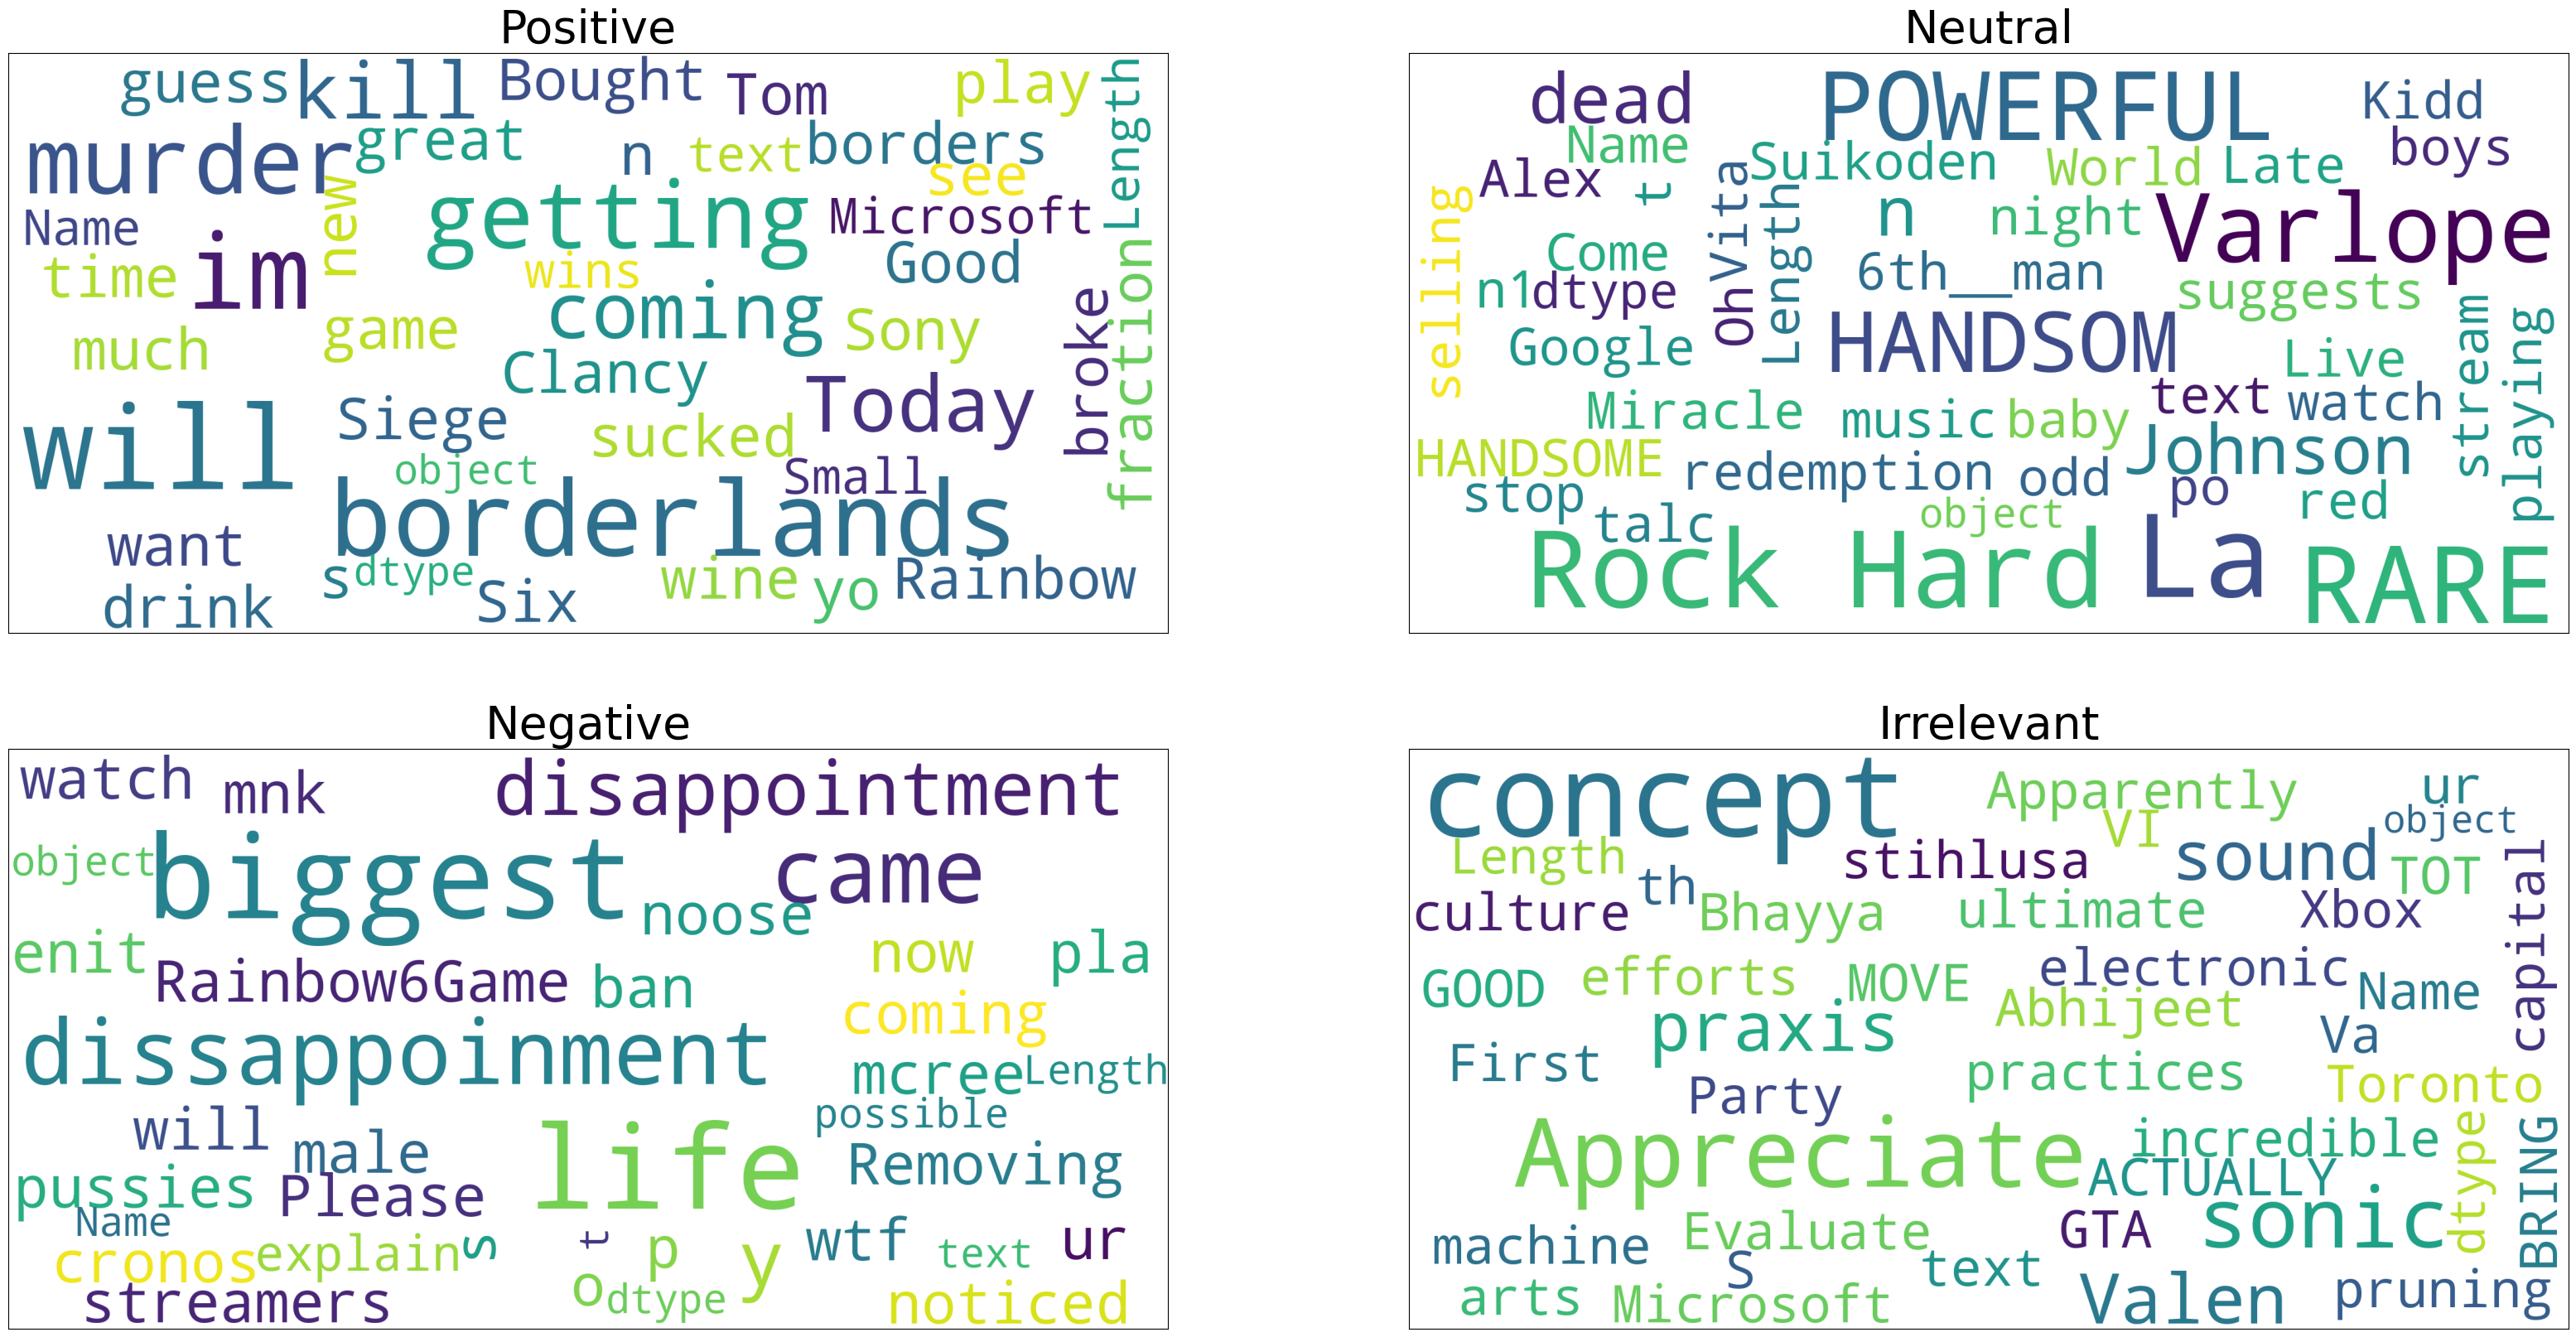

<Figure size 640x480 with 0 Axes>

In [27]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [37]:
import preprocess_kgptalkie as ps
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloads
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Helpers
def remove_html_tags(text):
    return BeautifulSoup(str(text), "html.parser").get_text()

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# Pipeline
df['text'] = df['text'].astype(str).str.lower()
df['text'] = df['text'].apply(ps.remove_urls)
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(ps.remove_special_chars)
df['text'] = df['text'].apply(ps.remove_rt)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(lemmatize_text)





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\palso\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\palso\AppData\Roaming\nltk_data...


In [38]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

In [42]:
X_train.shape, X_test.shape

((59717,), (14930,))

In [ ]:
# model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stopwords)), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

In [ ]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [46]:
X_test.tolist()[:20]

['add 4 callofduty roguecompany team everyone play play _ pso2 ghostrecon also one best grovers paladinsgame best junkrat mccree overwatchleague dont forget best vulcan smitegame play destinythegame fortnitegame',
 'tmobile guy kid really slow tuba star city az make people go google verizon',
 'make google top ranking high quality seo backlinks fiverrcom share nwewvp',
 'know guy who tablet crash today 10 year tried fix without google video plugging tv different outlet luck',
 'eamaddennfl movement incredible',
 'internship manager',
 'bgs first hearthstone battleground gameforcejphearthstonee3',
 'almost 2 year launch 3 cancelled season later bfv still game mp even though fully functional ghost campaign touche beyond every wire putting one nail coffin time',
 'wait horse arthura poo hahaha storeplaystationcom',
 'red dead redemption 3 2020 london leak pictwittercom78nagfdkjf',
 'pubg mobile harm anyone banning warm pakistan economy immost 20crores year since player buy royal pas every